**Описание датасета:**

В базе данных клиентов "Т-Города" содержится информация о пользователях и их характеристиках. 3 основных сервиса, которые анализируются: Топливо, Продукты и Афиша. В данных также есть скоры принадлежности к какому-то хобби или классу, которые получаются на основе расчетов ML-модели, сделанной таким образом, чтобы с максимальной точностью угадывать данные про клиентов.



**Цели и задачи проекта:**

1) Понять, чем клиенты Города отличаются от неклиентов, построив профили пользователей каждого из сервисов

2) Понять, какие из сервисов города наиболее прибыльные и какие группы клиентов приносят наибольшую выручку

3) Попытаться найти корреляционные зависимости между характеристиками клиентов

**Использованные библиотеки:**

1) **Pandas** для работы с датасетами

2) **Seaborn**, **Matplotlib** для визуализации и построения графиков

3) **Numpy** для математических операций

**Результаты:**
https://docs.google.com/presentation/d/1SMxOiQNf3WSOYaWdNDFqByPhFARQEy9u/edit?usp=sharing&ouid=112304590393588991977&rtpof=true&sd=true

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("city_clients.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

# Предварительный анализ данных


In [ ]:
display(df.shape)  # Кол-во строк и столбцов
display(df.columns) # Проверим колонки


(643860, 68)

Index(['party_rk', 'gorod_client_flg', 'fuel_gmv', 'fuel_avg_price',
       'fuel_n_orders', 'fuel_first_order_date', 'fuel_last_order_date',
       'supermarket_gmv', 'supermarket_avg_price', 'supermarket_n_orders',
       'supermarket_first_order_date', 'supermarket_last_order_date',
       'afisha_gmv', 'afisha_avg_price', 'afisha_n_orders',
       'afisha_first_order_date', 'afisha_last_order_date', 'region',
       'gender_cd', 'age', 'children_cnt', 'job_title', 'winter_sports_score',
       'foot_basket_volleyball_score', 'gym_score', 'other_sport_score',
       'no_sport_score', 'books_score', 'no_pet_score', 'personal_auto_score',
       'restorany_gmv', 'restorany_transactions_cnt', 'fast_fud_gmv',
       'fast_fud_transactions_cnt', 'odezhda_obuv_gmv',
       'odezhda_obuv_transactions_cnt', 'razvlechenija_gmv',
       'razvlechenija_transactions_cnt', 'obrazovanie_gmv',
       'obrazovanie_transactions_cnt', 'aviabilety_gmv',
       'aviabilety_transactions_cnt', 'toplivo_g

In [ ]:
df.describe() # Посмотрим, нет ли в данных каких-то отклонений / значений, которых не должно быть (например, отрицательных)


,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,afisha_gmv,afisha_avg_price,afisha_n_orders,region,age,children_cnt,winter_sports_score,foot_basket_volleyball_score,gym_score,other_sport_score,no_sport_score,books_score,no_pet_score,personal_auto_score,restorany_gmv,restorany_transactions_cnt,fast_fud_gmv,fast_fud_transactions_cnt,odezhda_obuv_gmv,odezhda_obuv_transactions_cnt,razvlechenija_gmv,razvlechenija_transactions_cnt,obrazovanie_gmv,obrazovanie_transactions_cnt,aviabilety_gmv,aviabilety_transactions_cnt,toplivo_gmv,toplivo_transactions_cnt,dom_remont_gmv,dom_remont_transactions_cnt,zh_d_bilety_gmv,zh_d_bilety_transactions_cnt,avtouslugi_gmv,avtouslugi_transactions_cnt,supermarkety_gmv,supermarkety_transactions_cnt,oteli_gmv,oteli_transactions_cnt,svjaz_telekom_gmv,svjaz_telekom_transactions_cnt,iskusstvo_gmv,iskusstvo_transactions_cnt,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
count,6.438600e+05,643860.000000,2.716830e+05,271683.000000,271683.000000,7.694300e+04,76943.000000,76943.000000,75106.000000,75106.000000,75106.000000,532515.000000,643638.000000,467228.000000,501202.000000,501202.000000,501202.000000,501202.000000,501202.000000,622427.000000,501202.000000,501202.000000,6.332200e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,633219.000000,633219.000000,633219.000000,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000,6.332190e+05,633219.000000
mean,6.567719e+08,0.564255,2.279625e+04,1700.781858,14.430778,1.059616e+04,1888.912428,6.068089,5918.974799,3002.659449,2.046574,50.717135,35.654568,0.109291,0.016947,0.016611,0.103364,0.088473,0.531377,0.045040,0.587248,0.319654,5.061620e+03,217.570998,8.536616e+03,217.570998,6.731916e+03,217.570998,6.603172e+03,217.570998,1.149439e+03,217.570998,3.566585e+03,217.570998,7.923450e+03,217.570998,1.143956e+04,217.570998,1.094943e+03,217.570998,6.740025e+03,217.570998,3.656122e+04,217.570998,1.100545e+03,217.570998,1.102643e+03,217.570998,28.327528,217.570998,193.160205,217.570998,3.318331e+02,217.570998,2.207224e+02,217.570998,4.242891e+02,217.570998,4.235351e+03,217.570998
std,3.216735e+08,0.495855,3.242571e+04,821.701830,20.196068,2.498340e+04,1382.906864,12.799380,9591.625926,3551.378661,2.184345,23.603767,12.381844,0.443064,0.098151,0.100565,0.231687,0.214397,0.499015,0.157212,0.492329,0.367534,1.740632e+04,219.023903,1.471244e+04,219.023903,2.819457e+04,219.023903,1.382008e+05,219.023903,1.098032e+04,219.023903,4.599531e+04,219.023903,1.718495e+04,219.023903,5.069151e+04,219.023903,8.678324e+03,219.023903,7.035152e+04,219.023903,5.298676e+04,219.023903,1.251135e+04,219.023903,8.592965e+03,219.023903,1032.275637,219.023903,912.937268,219.023903,5.309469e+03,219.023903,3.480333e+03,219.023903,4.106227e+03,219.023903,3.304206e+04,219.023903
min,2.910000e+02,0.000000,5.100000e-01,0.510000,1.000000,8.000000e+00,8.000000,1.000000,11.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000
25%,3.629764e+08,0.000000,3.653840e+03,1110.656667,2.000000,1.

<font color="blue"> Никаких заметных отклонений в данных нет

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643860 entries, 0 to 643859
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   party_rk                        643860 non-null  int64  
 1   gorod_client_flg                643860 non-null  int64  
 2   fuel_gmv                        271683 non-null  float64
 3   fuel_avg_price                  271683 non-null  float64
 4   fuel_n_orders                   271683 non-null  float64
 5   fuel_first_order_date           271683 non-null  object 
 6   fuel_last_order_date            271683 non-null  object 
 7   supermarket_gmv                 76943 non-null   float64
 8   supermarket_avg_price           76943 non-null   float64
 9   supermarket_n_orders            76943 non-null   float64
 10  supermarket_first_order_date    76943 non-null   object 
 11  supermarket_last_order_date     76943 non-null   object 
 12  afisha_gmv      

In [ ]:
display(df.head())
print()
display(df.tail())


,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,fuel_first_order_date,fuel_last_order_date,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,supermarket_first_order_date,supermarket_last_order_date,afisha_gmv,afisha_avg_price,afisha_n_orders,afisha_first_order_date,afisha_last_order_date,region,gender_cd,age,children_cnt,job_title,winter_sports_score,foot_basket_volleyball_score,gym_score,other_sport_score,no_sport_score,books_score,no_pet_score,personal_auto_score,restorany_gmv,restorany_transactions_cnt,fast_fud_gmv,fast_fud_transactions_cnt,odezhda_obuv_gmv,odezhda_obuv_transactions_cnt,razvlechenija_gmv,razvlechenija_transactions_cnt,obrazovanie_gmv,obrazovanie_transactions_cnt,aviabilety_gmv,aviabilety_transactions_cnt,toplivo_gmv,toplivo_transactions_cnt,dom_remont_gmv,dom_remont_transactions_cnt,zh_d_bilety_gmv,zh_d_bilety_transactions_cnt,avtouslugi_gmv,avtouslugi_transactions_cnt,supermarkety_gmv,supermarkety_transactions_cnt,oteli_gmv,oteli_transactions_cnt,svjaz_telekom_gmv,svjaz_telekom_transactions_cnt,iskusstvo_gmv,iskusstvo_transactions_cnt,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
0,1002611776,1,1499.06,749.530000,2.0,2023-05-22,2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,M,31.0,0.0,NaN,0.0,0.0,0.000000,0.000000,1.0,0.000000,1.0,0.339251,970.0,128.0,856.00,128.0,0.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0,1862.67,128.0,500.00,128.0,0.0,128.0,0.0,128.0,5753.00,128.0,0.0,128.0,0.00,128.0,0.0,128.0,798.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0
1,812910044,1,5600.68,1866.893333,3.0,2023-01-12,2024-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,M,33.0,0.0,NaN,0.0,0.0,0.000000,0.104639,0.0,0.000000,1.0,0.575158,0.0,92.0,8897.99,92.0,0.0,92.0,0.0,92.0,300.0,92.0,0.0,92.0,3646.00,92.0,0.00,92.0,0.0,92.0,6273.0,92.0,10316.98,92.0,0.0,92.0,0.00,92.0,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0
2,379196768,1,32831.06,1492.320909,22.0,2023-08-12,2024-09-28,3775.76,1887.88,2.0,2024-04-03,2024-06-21,NaN,NaN,NaN,NaN,NaN,74.0,F,66.0,NaN,Собственный неофициальный бизнес,0.0,0.0,0.000000,0.509928,0.0,0.301267,1.0,0.520804,1750.0,457.0,11038.92,457.0,403.0,457.0,0.0,457.0,0.0,457.0,0.0,457.0,3498.42,457.0,93588.31,457.0,0.0,457.0,16140.0,457.0,101986.01,457.0,0.0,457.0,9116.58,457.0,0.0,457.0,512.0,457.0,0.0,457.0,0.0,457.0,0.0,457.0,21680.0,457.0
3,695174271,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,880.0,440.0,2.0,2024-05-10,2024-05-10,30.0,F,28.0,0.0,Бухгалтер,0.0,0.0,0.156222,0.000000,0.0,0.177597,0.0,0.088948,3885.0,292.0,10717.17,292.0,1734.1,292.0,0.0,292.0,760.0,292.0,0.0,292.0,1799.86,292.0,6999.00,292.0,0.0,292.0,1440.0,292.0,31957.88,292.0,0.0,292.0,0.00,292.0,0.0,292.0,0.0,292.0,0.0,292.0,0.0,292.0,0.0,292.0,0.0,292.0
4,843828836,1,NaN,NaN,NaN,NaN,NaN,1687.82,1687.82,1.0,2024-10-04,2024-10-04,NaN,NaN,NaN,NaN,NaN,50.0,F,64.0,NaN,NaN,0.0,0.0,0.000000,0.000000,1.0,0.137091,1.0,0.000000,0.0,528.0,3081.26,528.0,10093.0,528.0,0.0,528.0,0.0,528.0,0.0,528.0,0.00,528.0,35215.47,528.0,0.0,528.0,0.0,528.0,63498.17,528.0,1200.0,528.0,1300.00,528.0,0.0,528.0,0.0,528.0,0.0,528.0,0.0,528.0,0.0,528.0,0.0,528.0


,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,fuel_first_order_date,fuel_last_order_date,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,supermarket_first_order_date,supermarket_last_order_date,afisha_gmv,afisha_avg_price,afisha_n_orders,afisha_first_order_date,afisha_last_order_date,region,gender_cd,age,children_cnt,job_title,winter_sports_score,foot_basket_volleyball_score,gym_score,other_sport_score,no_sport_score,books_score,no_pet_score,personal_auto_score,restorany_gmv,restorany_transactions_cnt,fast_fud_gmv,fast_fud_transactions_cnt,odezhda_obuv_gmv,odezhda_obuv_transactions_cnt,razvlechenija_gmv,razvlechenija_transactions_cnt,obrazovanie_gmv,obrazovanie_transactions_cnt,aviabilety_gmv,aviabilety_transactions_cnt,toplivo_gmv,toplivo_transactions_cnt,dom_remont_gmv,dom_remont_transactions_cnt,zh_d_bilety_gmv,zh_d_bilety_transactions_cnt,avtouslugi_gmv,avtouslugi_transactions_cnt,supermarkety_gmv,supermarkety_transactions_cnt,oteli_gmv,oteli_transactions_cnt,svjaz_telekom_gmv,svjaz_telekom_transactions_cnt,iskusstvo_gmv,iskusstvo_transactions_cnt,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
643855,125324345,1,20625.20,3437.533333,6.0,2024-04-07,2024-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,F,54.0,0.0,Администратор,0.0,0.0,0.076153,0.000000,1.0,0.0,1.0,0.352134,127334.62,118.0,0.0,118.0,2330.0,118.0,0.0,118.0,0.0,118.0,0.0,118.0,10951.09,118.0,0.0,118.0,0.0,118.0,0.0,118.0,0.00,118.0,0.0,118.0,0.0,118.0,0.0,118.0,0.0,118.0,0.0,118.0,0.0,118.0,0.0,118.0,0.0,118.0
643856,429138509,1,60249.46,1309.770870,46.0,2024-04-02,2024-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,M,32.0,0.0,ПРЕДСТАВИТЕЛЬ,0.0,0.0,0.000000,0.000000,1.0,0.0,1.0,0.536137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643857,1177849392,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1135.00,38.0,1420.0,38.0,0.0,38.0,0.0,38.0,0.0,38.0,0.0,38.0,0.00,38.0,0.0,38.0,0.0,38.0,0.0,38.0,10910.47,38.0,0.0,38.0,0.0,38.0,0.0,38.0,0.0,38.0,0.0,38.0,0.0,38.0,0.0,38.0,0.0,38.0
643858,370726922,1,3906.52,1302.173333,3.0,2024-09-28,2024-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,M,39.0,0.0,Собственный официальный бизнес,0.0,0.0,0.074563,0.118016,0.0,0.0,0.0,0.000000,400.00,110.0,1768.0,110.0,0.0,110.0,0.0,110.0,0.0,110.0,0.0,110.0,10539.75,110.0,699.0,110.0,0.0,110.0,2060.0,110.0,22449.68,110.0,0.0,110.0,0.0,110.0,0.0,110.0,0.0,110.0,0.0,110.0,0.0,110.0,45.0,110.0,0.0,110.0
643859,272964637,1,3282.73,1641.365000,2.0,2024-10-12,2024-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,M,33.0,1.0,NaN,0.0,0.0,0.000000,0.245907,0.0,0.0,1.0,0.112927,1206.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
party_rk,0
gorod_client_flg,0
fuel_gmv,372177
fuel_avg_price,372177
fuel_n_orders,372177
fuel_first_order_date,372177
fuel_last_order_date,372177
supermarket_gmv,566917
supermarket_avg_price,566917
supermarket_n_orders,566917


In [ ]:
df.duplicated().sum()

np.int64(0)

<font color="blue"> Дубликатов нет, все строки уникальны





In [ ]:
df['party_rk'].is_unique


True

<font color="blue"> Убедились, что id уникален




# Пол и возраст пользователей Города

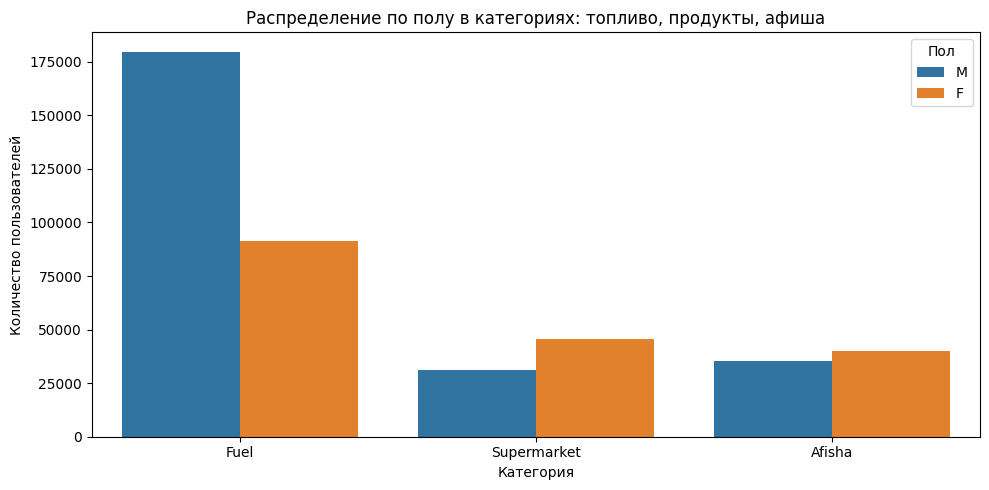

In [ ]:
# Фильтрация: оставляем только пользователей с покупками в каждой категории
fuel_users = df[df['fuel_n_orders'].notna()]
supermarket_users = df[df['supermarket_n_orders'].notna()]
afisha_users = df[df['afisha_n_orders'].notna()]

# Создаём отдельные датафреймы с указанием категории
fuel_users = fuel_users[['gender_cd']].copy()
fuel_users['category'] = 'Fuel'

supermarket_users = supermarket_users[['gender_cd']].copy()
supermarket_users['category'] = 'Supermarket'

afisha_users = afisha_users[['gender_cd']].copy()
afisha_users['category'] = 'Afisha'

# Объединяем всё в один DataFrame
gender_df = pd.concat([fuel_users, supermarket_users, afisha_users])

# Визуализация
plt.figure(figsize=(10, 5))
sns.countplot(data=gender_df, x='category', hue='gender_cd')
plt.title('Распределение по полу в категориях: топливо, продукты, афиша')
plt.xlabel('Категория')
plt.ylabel('Количество пользователей')
plt.legend(title='Пол')
plt.tight_layout()
plt.show()

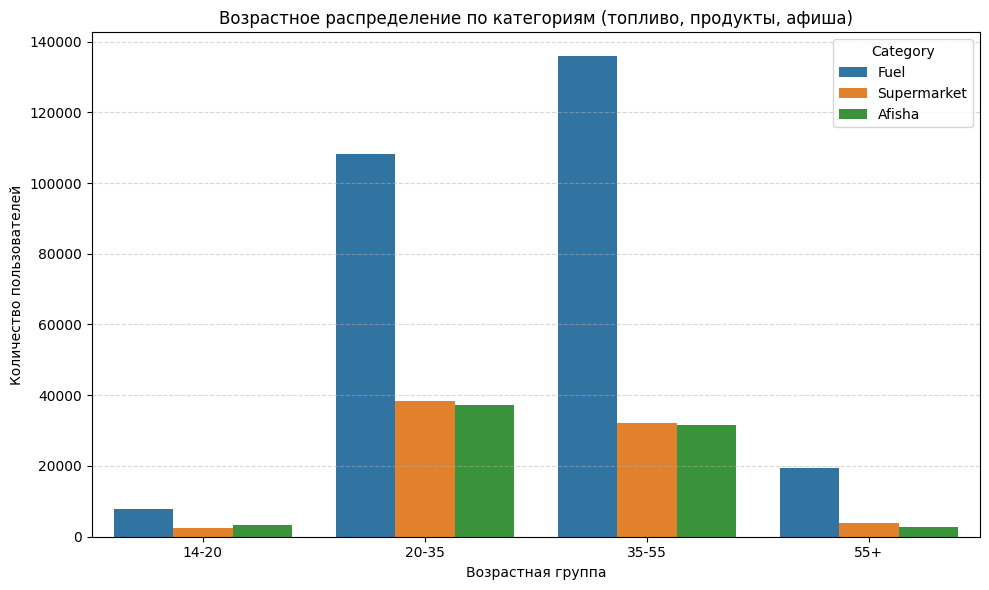

In [ ]:
df_unique_id = df.drop_duplicates(subset=['party_rk'], keep='first').copy()

# 1. Фильтруем пользователей по наличию заказов в категории "топливо"
fuel_mask = df_unique_id['fuel_n_orders'] > 0  # это True для не-NaN
fuel = df_unique_id[fuel_mask]
fuel = fuel[['age']].copy()
fuel['Category'] = 'Fuel'

# 2. Фильтруем "супермаркеты"
super_mask = df_unique_id['supermarket_n_orders'] > 0
supermarket = df_unique_id[super_mask]
supermarket = supermarket[['age']].copy()
supermarket['Category'] = 'Supermarket'

# 3. Фильтруем "афиша"
afisha_mask = df_unique_id['afisha_n_orders'] > 0
afisha = df_unique_id[afisha_mask]
afisha = afisha[['age']].copy()
afisha['Category'] = 'Afisha'

# 4. Объединяем три таблицы
all_data = pd.concat([fuel, supermarket, afisha])

# 5. Убираем строки с пустым возрастом
age_mask = all_data['age'] == all_data['age']
all_data = all_data[age_mask]

# 6. Ограничиваем возраст: только от 14 до 90 лет
all_data = all_data[all_data['age'] >= 14]
all_data = all_data[all_data['age'] <= 90]

# 7. Создаём возрастные категории
bins = [14, 20, 35, 55, 150]
labels = ['14-20', '20-35', '35-55', '55+']
all_data['age_group'] = pd.cut(all_data['age'], bins=bins, labels=labels, right=False)

# 8. Визуализация
plt.figure(figsize=(10, 6))
sns.countplot(data=all_data, x='age_group', hue='Category')

plt.title('Возрастное распределение по категориям (топливо, продукты, афиша)')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



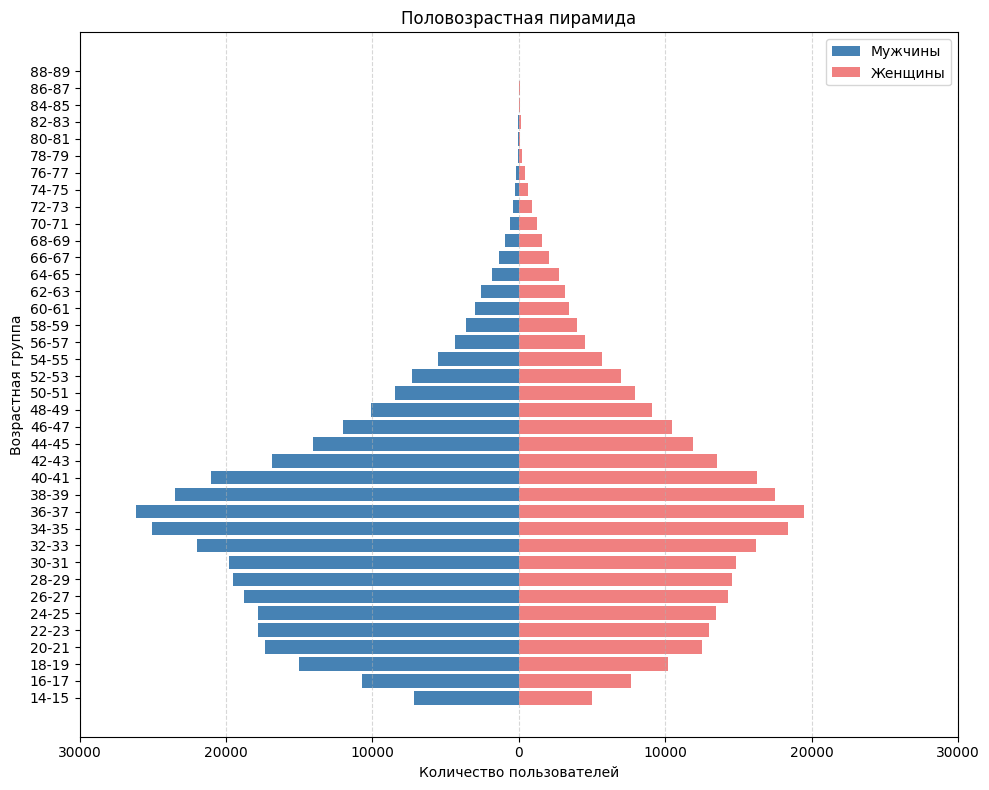

In [ ]:
# Оставляем только нужные столбцы
data =  df_unique_id[['age', 'gender_cd']].copy()

# Убираем строки с отсутствующим возрастом или полом
data = data[(data['age'] == data['age']) & (data['gender_cd'] == data['gender_cd'])]

# Оставляем пользователей только от 14 до 90 лет
data = data[(data['age'] >= 14) & (data['age'] <= 90)]

# Создаём возрастные группы и группируем по ним
bins = list(range(14, 92, 2))
labels = [f'{i}-{i+1}' for i in bins[:-1]]
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
grouped = data.groupby(['age_group', 'gender_cd']).size().unstack(fill_value=0)

# Получаем данные по полу
men = grouped.get('M', pd.Series(0, index=grouped.index)) * -1
women = grouped.get('F', pd.Series(0, index=grouped.index))

# Строим график
plt.figure(figsize=(10, 8))
plt.barh(men.index, men, color='steelblue', label='Мужчины')
plt.barh(women.index, women, color='lightcoral', label='Женщины')
plt.title('Половозрастная пирамида')
plt.xlabel('Количество пользователей')
plt.ylabel('Возрастная группа')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
xticks = plt.xticks()[0]
xtick_labels = [abs(int(x)) for x in xticks]
plt.xticks(xticks, xtick_labels)
plt.tight_layout()
plt.show()


# Оборот сервисов Города

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cmap = cm.get_cmap('Blues', 7)
colors_1 = [cmap(i) for i in range(2,5)]
colors_2 = [cmap(i) for i in range(3,6)]
colors = sns.color_palette('plasma')[1:4]
colors_ = sns.color_palette('pastel')[:3]
colors_olors_ = sns.color_palette('viridis')[1:4]




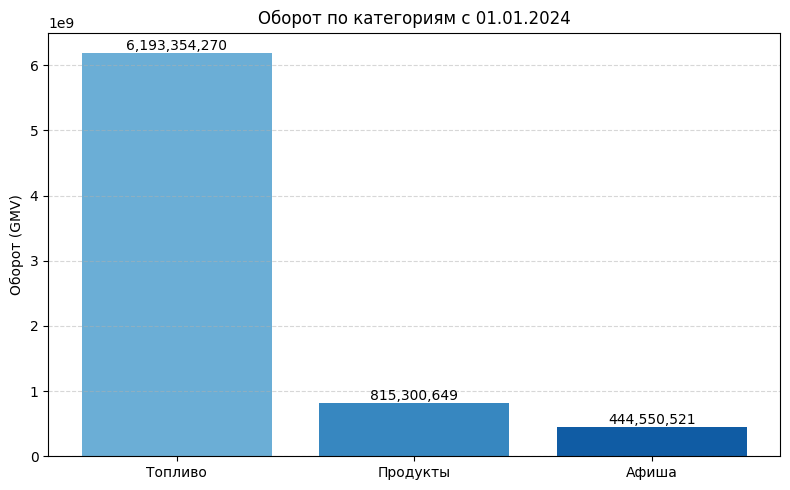

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Выбираем только нужные столбцы
gmv_data = df[['fuel_gmv', 'supermarket_gmv', 'afisha_gmv']].copy()

# Суммируем оборот по каждой категории
total_fuel = gmv_data['fuel_gmv'].sum()
total_supermarket = gmv_data['supermarket_gmv'].sum()
total_afisha = gmv_data['afisha_gmv'].sum()

# Готовим данные для графика
categories = ['Топливо', 'Продукты', 'Афиша']
values = [total_fuel, total_supermarket, total_afisha]

# Строим график
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=colors_2)

for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Оборот по категориям с 01.01.2024')
plt.ylabel('Оборот (GMV)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

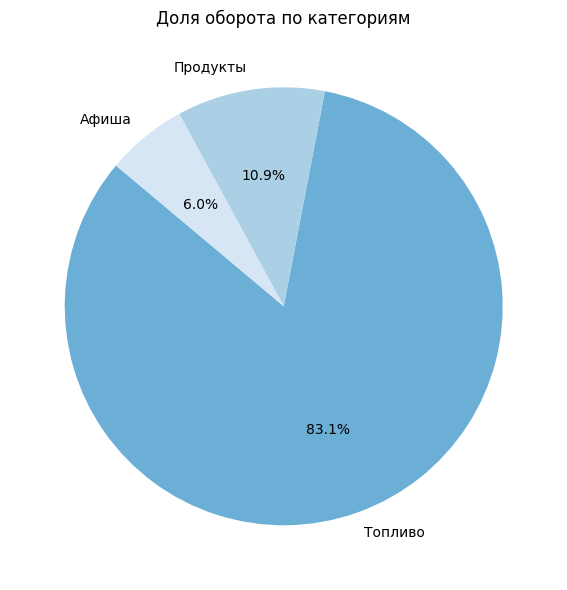

Категория           Оборот
  Топливо 6,193,354,269.90
 Продукты   815,300,649.36
    Афиша   444,550,521.25


In [ ]:
fuel_total = df['fuel_gmv'].sum()
supermarket_total = df['supermarket_gmv'].sum()
afisha_total = df['afisha_gmv'].sum()

gmv_table = pd.DataFrame({
    'Категория': ['Топливо', 'Продукты', 'Афиша'],
    'Оборот': [fuel_total, supermarket_total, afisha_total]
})

pd.options.display.float_format = '{:,.2f}'.format

plt.figure(figsize=(6, 6))
n = len(gmv_table)


cmap = cmap = cm.get_cmap('Blues_r', 7)
colors = [cmap(i) for i in range(3,6)]
plt.pie(
    gmv_table['Оборот'],
    labels=gmv_table['Категория'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
plt.title('Доля оборота по категориям')
plt.tight_layout()
plt.show()

# Таблица

print(gmv_table.to_string(index=False))

# Количество заказов в сервисах Города в зависимости от возраста пользователей (Boxplots)

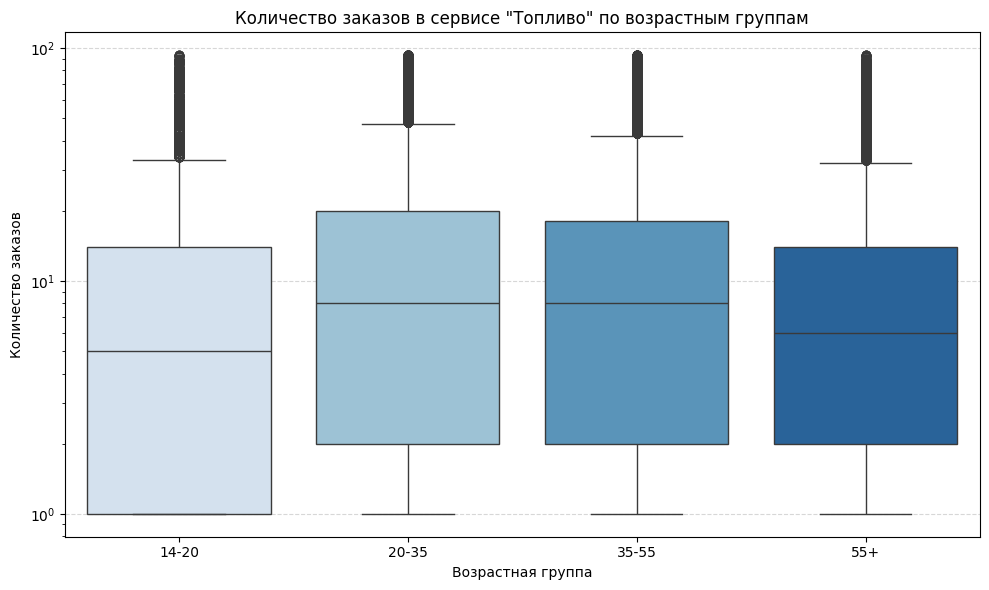

In [ ]:
# Берём возраст и количество заказов на топливо
fuel_data = df[['age', 'fuel_n_orders']].copy()

# Убираем пропуски
fuel_data = fuel_data[(fuel_data['age'] == fuel_data['age']) & (fuel_data['fuel_n_orders'] == fuel_data['fuel_n_orders'])]

# Фильтруем
fuel_data = fuel_data[(fuel_data['age'] >= 14) & (fuel_data['age'] <= 90)]

# Удаляем верхний 1% пользователей по fuel_n_orders (чистим от выбросов)
threshold = fuel_data['fuel_n_orders'].quantile(0.99)
fuel_data = fuel_data[fuel_data['fuel_n_orders'] <= threshold]

# Группировка
bins = [14, 20, 35, 55, 150]
labels = ['14-20', '20-35', '35-55', '55+']
fuel_data['age_group'] = pd.cut(fuel_data['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=fuel_data,
    x='age_group',
    y='fuel_n_orders',
    showfliers=True,
    palette='Blues'
)

plt.title('Количество заказов в сервисе "Топливо" по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество заказов')
plt.yscale('log')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Удалено 756 выбросов (верхний 1%) из 76895 строк


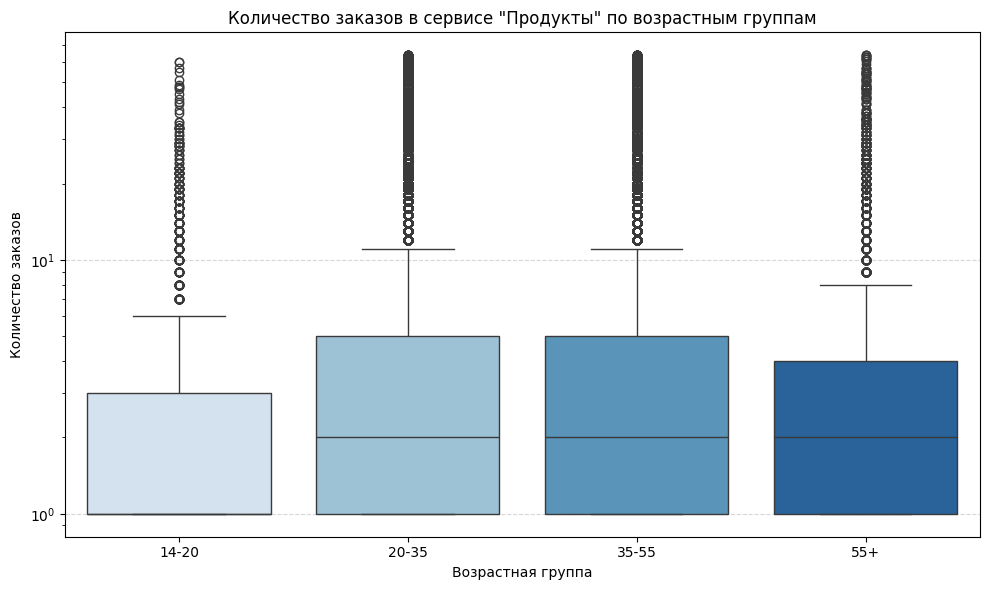

In [ ]:
# Берём возраст и количество заказов на продукты
supermarket_data = df[['age', 'supermarket_n_orders']].copy()

# Убираем пропуски
supermarket_data = supermarket_data[
    (supermarket_data['age'] == supermarket_data['age']) &
    (supermarket_data['supermarket_n_orders'] == supermarket_data['supermarket_n_orders'])
]

# Фильтруем
supermarket_data = supermarket_data[
    (supermarket_data['age'] >= 14) & (supermarket_data['age'] <= 90)
]

# Удаляем верхний 1% пользователей по supermarket_n_orders (чистим от выбросов)
initial_count = supermarket_data.shape[0]
threshold = supermarket_data['supermarket_n_orders'].quantile(0.99)
supermarket_data = supermarket_data[supermarket_data['supermarket_n_orders'] <= threshold]
final_count = supermarket_data.shape[0]
removed_rows = initial_count - final_count

print(f"Удалено {removed_rows} выбросов (верхний 1%) из {initial_count} строк")

# Группировка
bins = [14, 20, 35, 55, 150]
labels = ['14-20', '20-35', '35-55', '55+']
supermarket_data['age_group'] = pd.cut(supermarket_data['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=supermarket_data,
    x='age_group',
    y='supermarket_n_orders',
    showfliers=True,
    palette='Blues'
)

plt.title('Количество заказов в сервисе "Продукты" по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество заказов')
plt.yscale('log')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Удалено 747 выбросов (верхний 1%) из 74831 строк


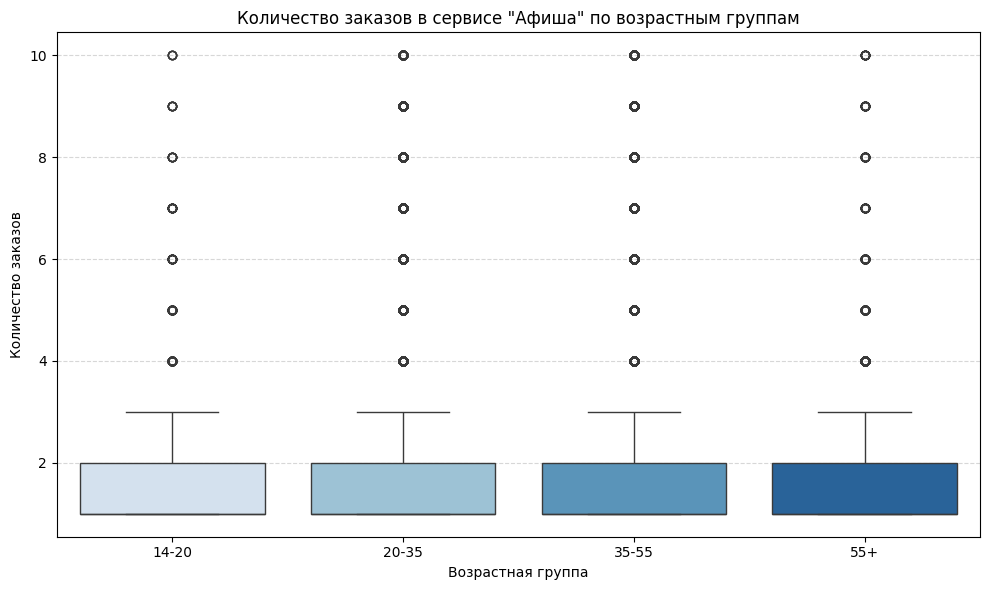

In [ ]:
# Берём возраст и количество заказов в категории "Афиша"
afisha_data = df[['age', 'afisha_n_orders']].copy()

# Убираем пропуски
afisha_data = afisha_data[
    (afisha_data['age'] == afisha_data['age']) &
    (afisha_data['afisha_n_orders'] == afisha_data['afisha_n_orders'])
]

# Фильтруем
afisha_data = afisha_data[
    (afisha_data['age'] >= 14) & (afisha_data['age'] <= 90)
]

# Удаляем верхний 1% пользователей по afisha_n_orders (чистим от выбросов)
initial_count = afisha_data.shape[0]
threshold = afisha_data['afisha_n_orders'].quantile(0.99)
afisha_data = afisha_data[afisha_data['afisha_n_orders'] <= threshold]
final_count = afisha_data.shape[0]
removed_rows = initial_count - final_count

print(f"Удалено {removed_rows} выбросов (верхний 1%) из {initial_count} строк")

# Группировка
bins = [14, 20, 35, 55, 150]
labels = ['14-20', '20-35', '35-55', '55+']
afisha_data['age_group'] = pd.cut(afisha_data['age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10, 6))
sns.boxplot(
    data=afisha_data,
    x='age_group',
    y='afisha_n_orders',
    showfliers=True,
    palette='Blues'
)

plt.title('Количество заказов в сервисе "Афиша" по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество заказов')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<font color="blue"> Почистили данные от выбросов, построили боксплоты, они получились очень странные. Получаем, что во всех группах в основном совершают по 1-2 заказа. Проверим это, посчитав **retention rate (количество пользователей, которые, сделав 1 заказ, вернулись в сервис):**

In [ ]:
# отбираем нужные столбцы
afisha_retention = df[['party_rk', 'afisha_first_order_date', 'afisha_last_order_date']].copy()

# убираем пропущенные значения
afisha_retention = afisha_retention[
    (afisha_retention['afisha_first_order_date'] == afisha_retention['afisha_first_order_date']) &
    (afisha_retention['afisha_last_order_date'] == afisha_retention['afisha_last_order_date'])
]

# 3. Преобразуем даты
afisha_retention['afisha_first_order_date'] = pd.to_datetime(afisha_retention['afisha_first_order_date'])
afisha_retention['afisha_last_order_date'] = pd.to_datetime(afisha_retention['afisha_last_order_date'])

afisha_retention['days_between'] = (afisha_retention['afisha_last_order_date'] - afisha_retention['afisha_first_order_date']).dt.days

# Retention: 1 — если был возврат, 0 — если только один день
afisha_retention['retained'] = afisha_retention['days_between'] > 0

# считаем Retention Rat
total_users = len(afisha_retention)
retained_users = afisha_retention['retained'].sum()
retention_rate = retained_users / total_users

print(f"Всего пользователей в 'Афише': {total_users}")
print(f"Удержано (возвратились повторно): {retained_users}")
print(f"Retention Rate: {retention_rate:.2%}")

Всего пользователей в 'Афише': 75106
Удержано (возвратились повторно): 50349
Retention Rate: 67.04%


In [ ]:
# нужные поля
afisha_retention = df[['party_rk', 'afisha_n_orders', 'afisha_gmv']].copy()

# строки с пропущенными значениями
afisha_retention = afisha_retention[
    (afisha_retention['afisha_n_orders'] == afisha_retention['afisha_n_orders']) &
    (afisha_retention['afisha_gmv'] == afisha_retention['afisha_gmv'])
]

# оставляем пользователей, у которых afisha_gmv > 0
afisha_retention = afisha_retention[afisha_retention['afisha_gmv'] > 0]

# Флаг: пользователь сделал >2 заказов
afisha_retention['retained_3+'] = afisha_retention['afisha_n_orders'] >= 3

# retention
total_users = len(afisha_retention)
retained_users = afisha_retention['retained_3+'].sum()
retention_rate = retained_users / total_users

print(f"Всего пользователей в 'Афише' с ненулевыми заказами: {total_users}")
print(f"Пользователей, сделавших ≥3 заказа: {retained_users}")
print(f"Retention 2+ Rate (GMV > 0): {retention_rate:.2%}")

Всего пользователей в 'Афише' с ненулевыми заказами: 75106
Пользователей, сделавших ≥3 заказа: 16399
Retention 2+ Rate (GMV > 0): 21.83%


# Корреляционные зависимости между переменными

Посмотрев на корреляцию всего со всем, я увидел, что все коэффициенты корреляции близки к нулю, но все же попытаемся посмотреть и найти корреляционные зависимости между переменными

Посмотрим на корреляцию поведенчиских признаков, она может быть полезна для предсказаний предпочтений пользователей и таргета рекламы / услуг

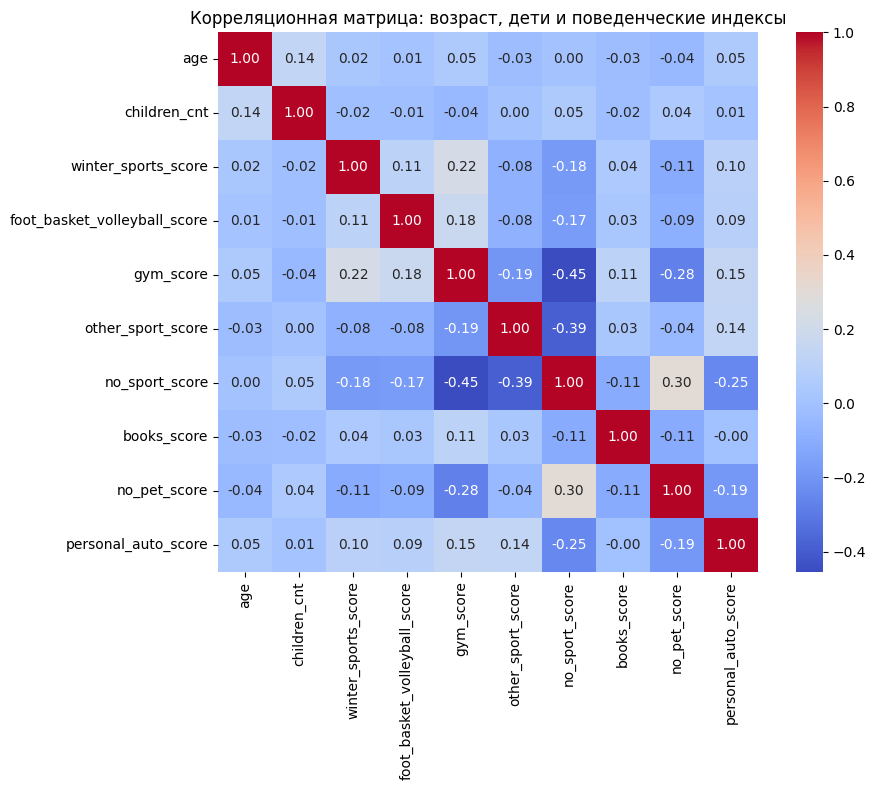

In [ ]:
# Выбранные переменные
selected_columns = [
    'age', 'children_cnt', 'winter_sports_score',
    'foot_basket_volleyball_score', 'gym_score', 'other_sport_score',
    'no_sport_score', 'books_score', 'no_pet_score', 'personal_auto_score'
]

# Копируем и убираем пропущенные значения
corr_subset = df[selected_columns].copy()
corr_subset = corr_subset.dropna()

# Считаем корреляционную матрицу
corr_matrix = corr_subset.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

plt.title('Корреляционная матрица: возраст, дети и поведенческие индексы')
plt.tight_layout()
plt.show()


Не нашли значимых зависимостей, ни одного коэффициента корреляции, большего 0.5 по модулю

Посмотрим на корреляцию возраста и трат в каждом сервисе

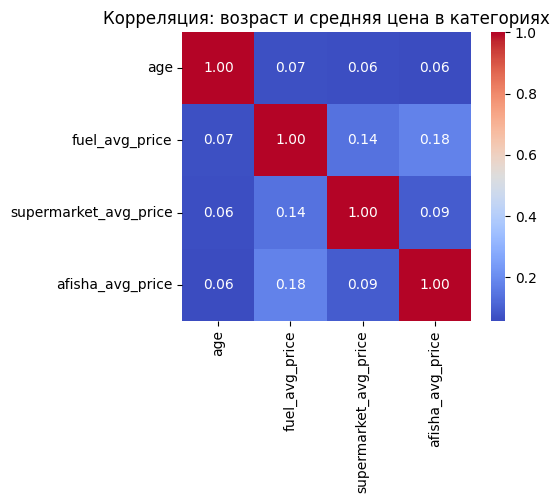

In [ ]:
cols = ['age', 'fuel_avg_price', 'supermarket_avg_price', 'afisha_avg_price']

# Копируем и удаляем строки с пропущенными значениями
subset = df[cols].copy()
subset = subset.dropna()

# Корреляционная матрица
corr_matrix = subset.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

plt.title('Корреляция: возраст и средние траты в категориях')
plt.tight_layout()
plt.show()

Опять же, значимых корреляций не нашли

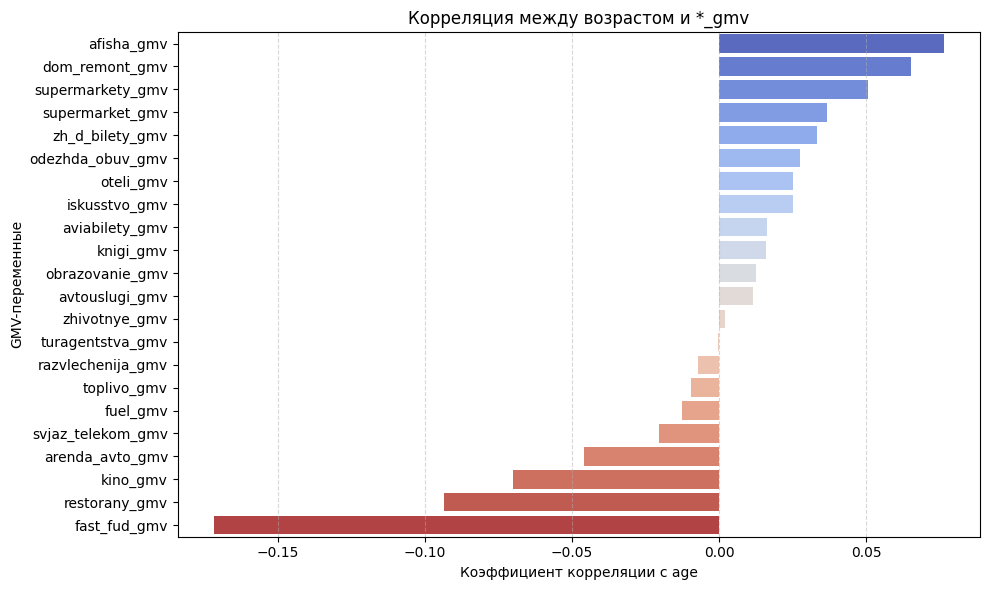

In [ ]:
# Все gmv переменные + возраст
gmv_cols = ['age'] + [col for col in df.columns if col.endswith('_gmv')]
gmv_data = df[gmv_cols].copy()

# Удаляем строки с пропущенными значениями
gmv_data = gmv_data.dropna()

# корреляционная матрица
corr_matrix = gmv_data.corr()
age_corr = corr_matrix['age'].drop('age').sort_values(ascending=False)

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_corr.values, y=age_corr.index, palette='coolwarm')

plt.title('Корреляция между возрастом и объемом трат (во всех категориях)')
plt.xlabel('Коэффициент корреляции с age')
plt.ylabel('GMV-переменные')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Видим, что возраст, несмотря на наши ожидания, ни с чем не коррелирует. Максимальный по модулю коэффициент корреляции чуть больше 0.15, слишком мало.

Попробуем посмотреть на корреляцию возраста и среднего чека:

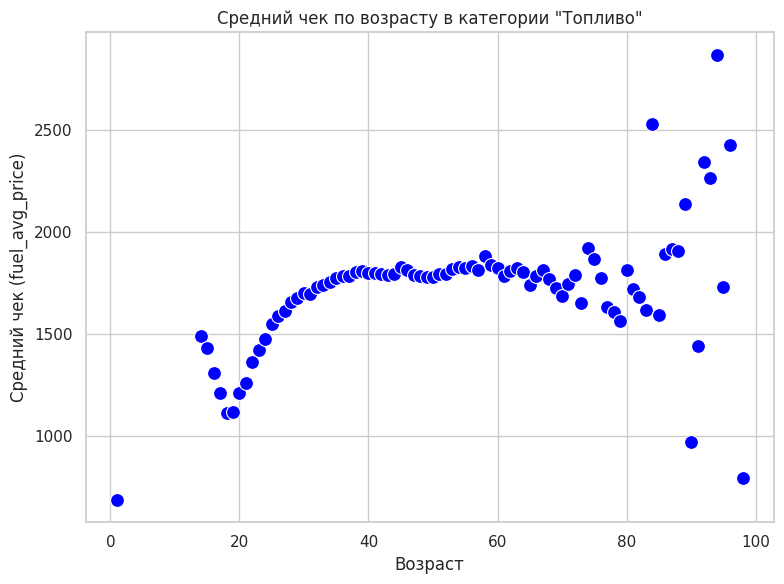

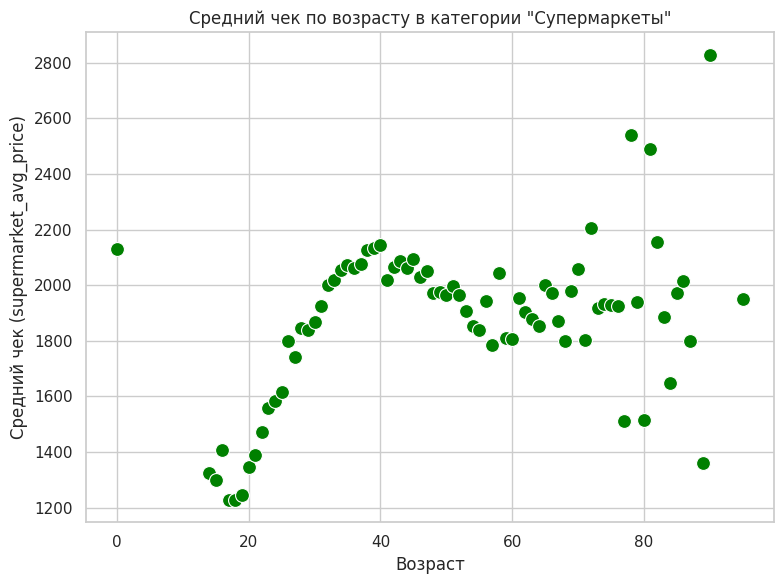

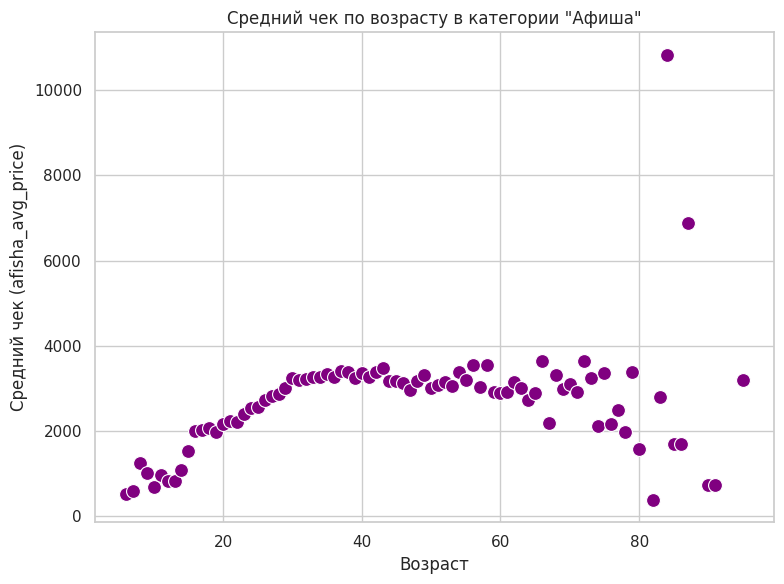

In [ ]:
# Группируем данные по возрасту и вычисляем средний чек для каждой группы
mean_prices_by_age = df.groupby('age')[['fuel_avg_price', 'supermarket_avg_price', 'afisha_avg_price']].mean().reset_index()

# scatterplot для "Топлива"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mean_prices_by_age, x='age', y='fuel_avg_price', color='blue', s=100)
plt.title('Средний чек по возрасту в категории "Топливо"')
plt.xlabel('Возраст')
plt.ylabel('Средний чек (fuel_avg_price)')
plt.grid(True)
plt.tight_layout()
plt.show()

# scatterplot для "Продуктов"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mean_prices_by_age, x='age', y='supermarket_avg_price', color='green', s=100)
plt.title('Средний чек по возрасту в категории "Продукты"')
plt.xlabel('Возраст')
plt.ylabel('Средний чек (supermarket_avg_price)')
plt.grid(True)
plt.tight_layout()
plt.show()

# scatterplot для "Афишы"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mean_prices_by_age, x='age', y='afisha_avg_price', color='purple', s=100)
plt.title('Средний чек по возрасту в категории "Афиша"')
plt.xlabel('Возраст')
plt.ylabel('Средний чек (afisha_avg_price)')
plt.grid(True)
plt.tight_layout()
plt.show()


Средний чек в категоории "Топливо" монотонно возрастает с увеличением возраста, пусть и с разными темпами. У "Продуктов" тренд немонотонный, нелинейный и даже не может быть приближен квадратичной или кубической функцией. У "Афиши" есть возникающее с ростом возраста "облако" - большой разброс значений.

# Средний чек пользователей Города в зависимости от возраста

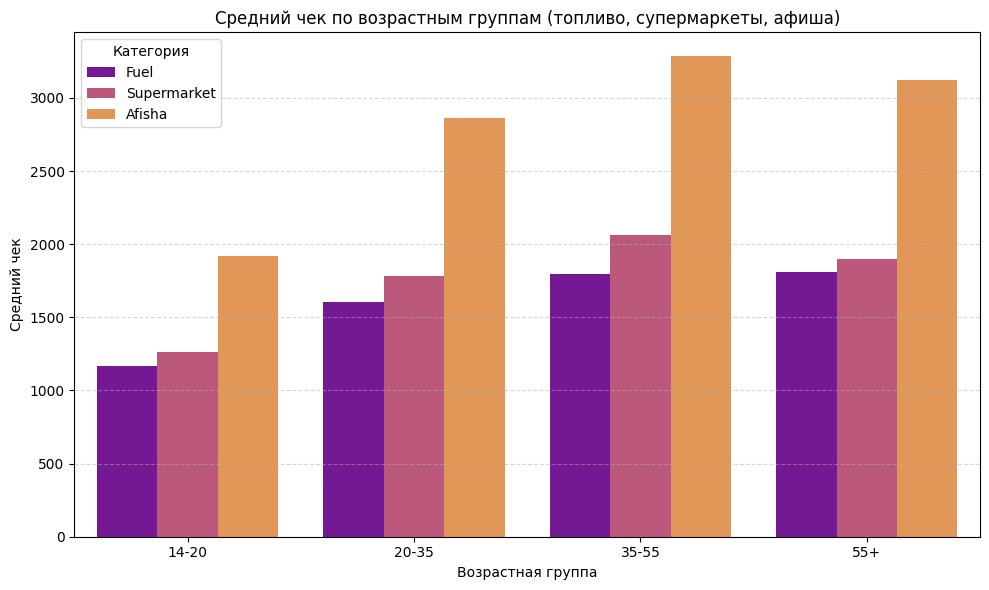

In [ ]:
cols = ['age', 'fuel_avg_price', 'supermarket_avg_price', 'afisha_avg_price']
df_age_avg = df[cols].copy()

# оставляем пользователей с адекватным возрастом
df_age_avg = df_age_avg[(df_age_avg['age'] == df_age_avg['age']) & (df_age_avg['age'] >= 14) & (df_age_avg['age'] <= 90)]

# создаём возрастные группы
bins = [14, 20, 35, 55, 150]
labels = ['14-20', '20-35', '35-55', '55+']
df_age_avg['age_group'] = pd.cut(df_age_avg['age'], bins=bins, labels=labels, right=False)

# группируем по возрасту и считаем средний чек
grouped = df_age_avg.groupby('age_group')[['fuel_avg_price', 'supermarket_avg_price', 'afisha_avg_price']].mean().reset_index()

# преобразуем в нормальный формат для seaborn (здесь использовался GPT)
df_melted = grouped.melt(id_vars='age_group', var_name='category', value_name='avg_price')
df_melted['category'] = df_melted['category'].str.replace('_avg_price', '').str.capitalize()

# столбчатая диаграмма
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='age_group', y='avg_price', hue='category', palette='plasma')

plt.title('Средний чек по возрастным группам (топливо, супермаркеты, афиша)')
plt.xlabel('Возрастная группа')
plt.ylabel('Средний чек')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Категория')
plt.tight_layout()
plt.show()

1) Во всех категориях видна устойчивая положительная динамика среднего чека от младших к старшим возрастным группам.

2) Пользователи Города в возрасте от 25 до 55 лет совершают самые дорогие покупки во всех трех сервисах

3)  Афиша — категория с наибольшим средним чеком во всех возрастах, особенно у возрастных групп 35–55 и 55+. Это может указывать на то, что афиша чаще используется более зрелой и состоятельной аудиторией.

# Профили пользователей сервисов "Топливо", "Продукты" и "Афиша"

Text(0.5, 1.08, 'Профиль пользователя сервиса "Топливо"')

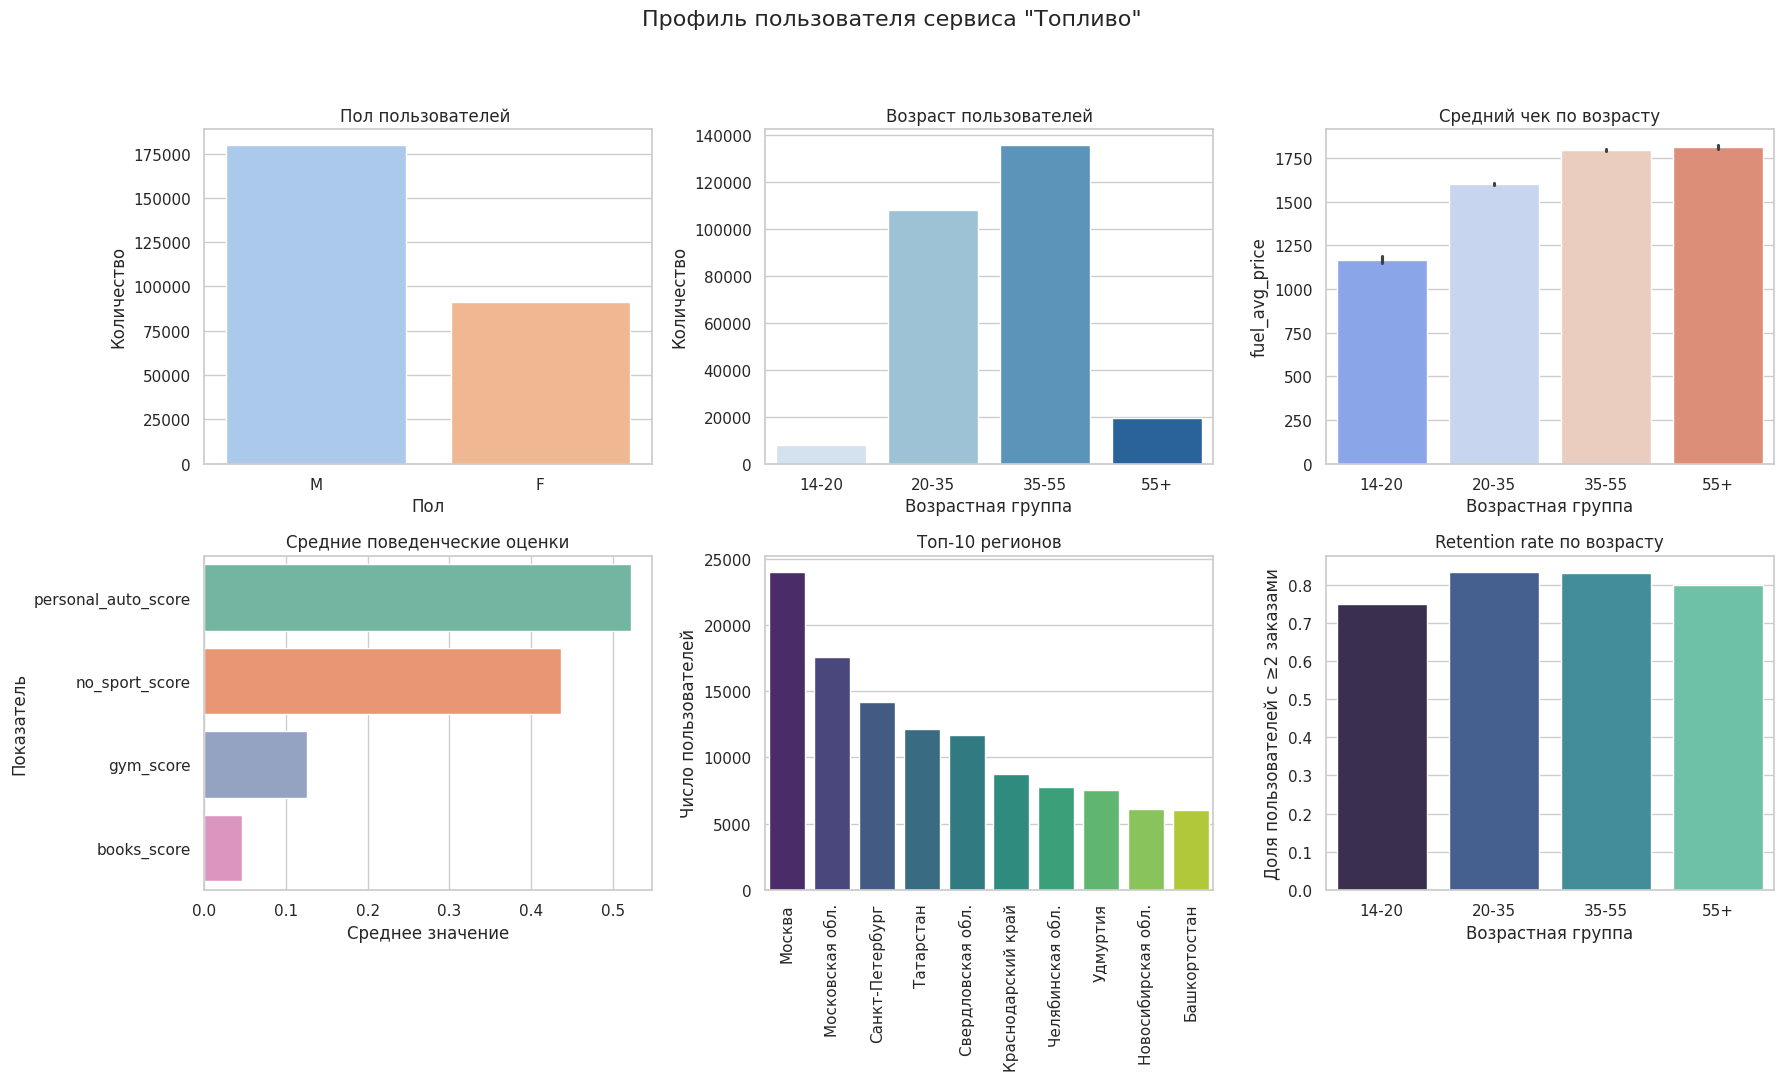

In [ ]:
# Ищем пользователей с хотя бы один заказом в "Топливе":
fuel_users = df[df['fuel_n_orders'] > 0].copy()

# Возрастные группы:
fuel_users = fuel_users[(fuel_users['age'] == fuel_users['age']) & (fuel_users['age'] >= 14) & (fuel_users['age'] <= 90)]
bins = [14, 20, 35, 55, 150]
labels = ['14-20', '20-35', '35-55', '55+']
fuel_users['age_group'] = pd.cut(fuel_users['age'], bins=bins, labels=labels, right=False)

# Флаг для конверсии: был ли повторный заказ
fuel_users['repeat'] = fuel_users['fuel_n_orders'] >= 2

# Доля повторных заказов по возрасту:
fuel_grouped = fuel_users.groupby('age_group')
repeat_ = fuel_grouped['repeat'].mean()
retention = repeat_.reset_index()

# Графики
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

# Распределение по полу
plt.subplot(2, 3, 1)
sns.countplot(data=fuel_users, x='gender_cd', palette='pastel')
plt.title('Пол пользователей ')
plt.xlabel('Пол')
plt.ylabel('Количество')

# Распределение по возрастным группам
plt.subplot(2, 3, 2)
sns.countplot(data=fuel_users, x='age_group', palette='Blues')
plt.title('Возраст пользователей')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')

# Средний чек по возрасту
plt.subplot(2, 3, 3)
sns.barplot(data=fuel_users, x='age_group', y='fuel_avg_price', palette='coolwarm')
plt.title('Средний чек по возрасту')
plt.xlabel('Возрастная группа')
plt.ylabel('fuel_avg_price')

# Средние поведенческие оценки
plt.subplot(2, 3, 4)
behavior_columns = ['gym_score', 'no_sport_score', 'books_score', 'personal_auto_score']
behavior_means = fuel_users[behavior_columns].mean().sort_values(ascending=False)
sns.barplot(x=behavior_means.values, y=behavior_means.index, palette='Set2')
plt.title('Средние поведенческие оценки')
plt.xlabel('Среднее значение')
plt.ylabel('Показатель')

# Топ регионов
plt.subplot(2, 3, 5)
top_reg = fuel_users['region'].value_counts().head(10)
region_names = {77: 'Москва', 78: 'Санкт-Петербург', 50: 'Московская обл.', 66: 'Свердловская обл.', 54: 'Новосибирская обл.',
23: 'Краснодарский край', 74: 'Челябинская обл.', 52: 'Удмуртия', 16: 'Татарстан', 2: 'Башкортостан'}
region_labels = [region_names.get(code, f'Регион {int(code)}') for code in top_reg.index]

sns.barplot(x=region_labels, y=top_reg.values, palette='viridis')
plt.title('Топ-10 регионов по числу пользователей')
plt.ylabel('Число пользователей')
plt.xticks(rotation=90)


# Конверсия (второй заказ) по возрасту
plt.subplot(2, 3, 6)
sns.barplot(data=retention, x='age_group', y='repeat', palette='mako')
plt.title('Retention rate по возрасту')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля пользователей с ≥2 заказами')

# Финальный отступ
plt.tight_layout()
plt.suptitle('Профиль пользователя сервиса "Топливо"', fontsize=16, y=1.08)


Видим, что сервисом "Топливо" пользуется значительно больше мужчин, чем женщин. В основном, это люди возраста от 20 до 55 лет, имеющий высокий personal_auto_score, что логично. Чаще всего сервисом пользуются москвичи, но жители других регионов занимают тоже весьма значительную долю. У сервиса довольно высокий retention rate: больше, чем 75% пользователей всех возрастов возвращаются после первого раза.

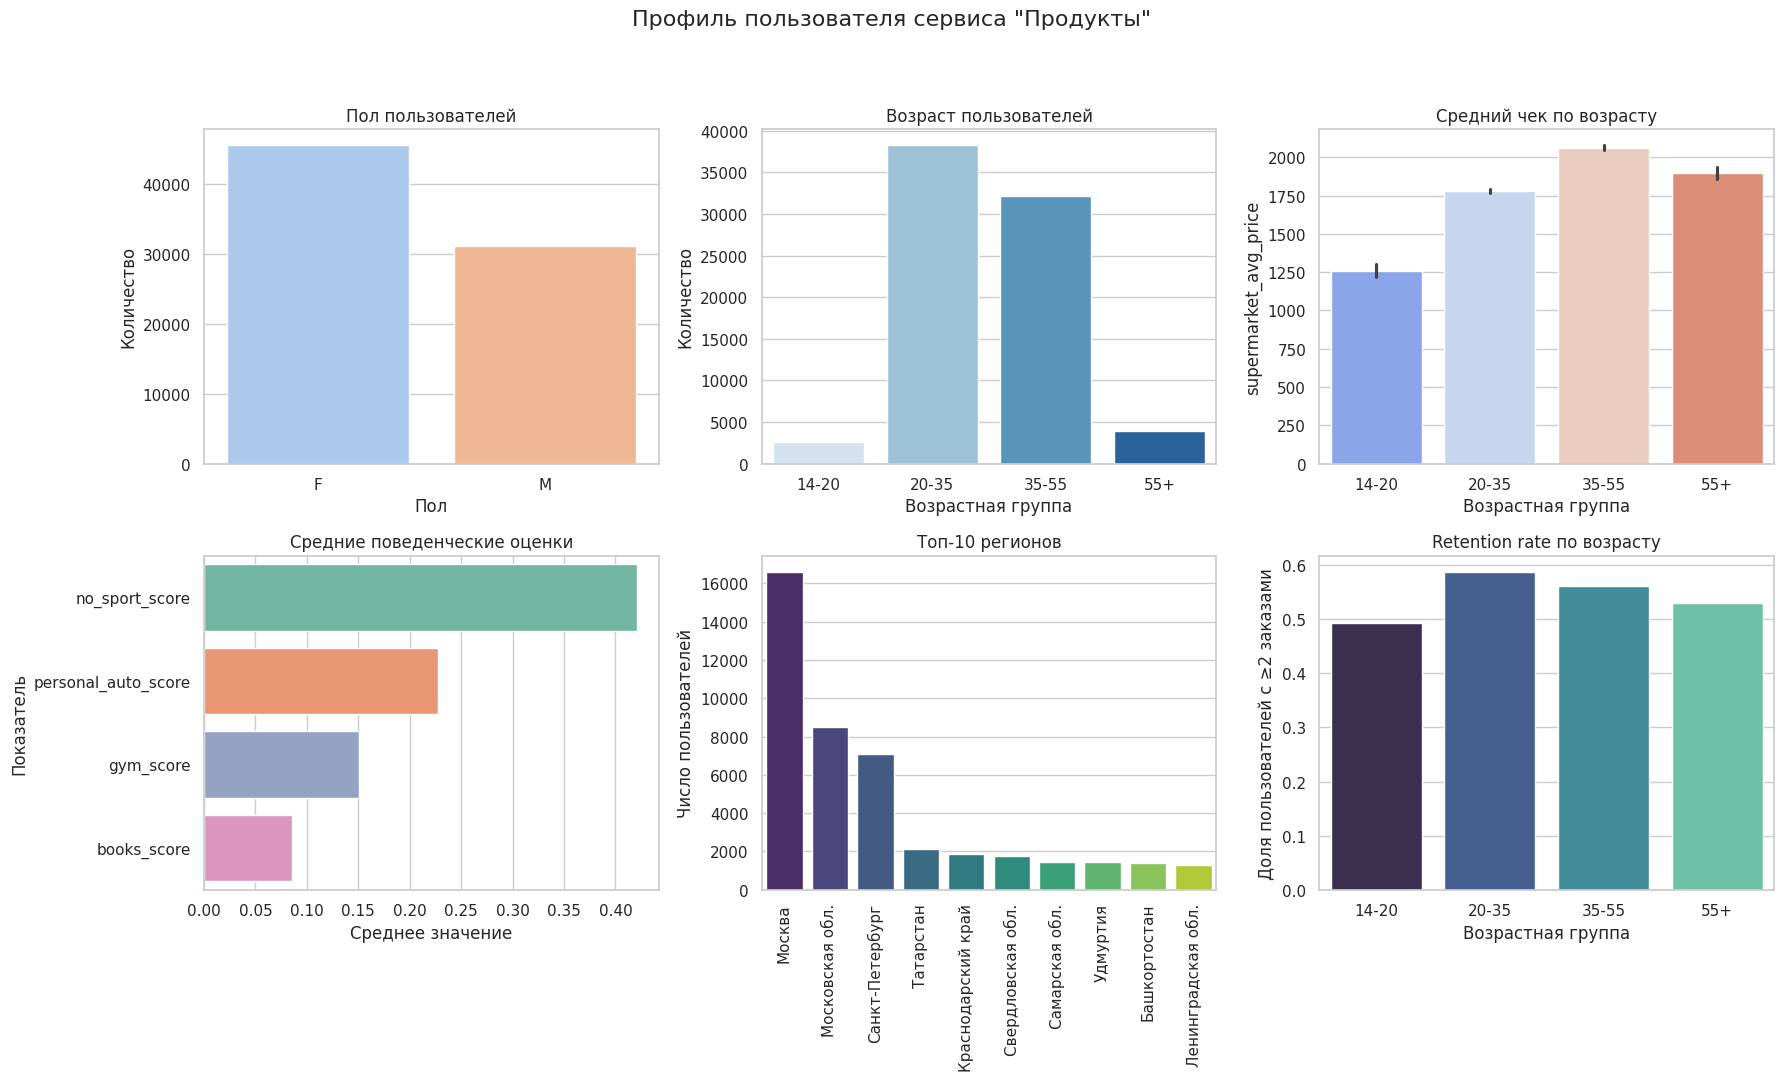

In [ ]:
# Пользователи с хотя бы одним заказом в "Продуктах"
supermarket_users = df[df['supermarket_n_orders'] > 0].copy()

# Возрастные группы
supermarket_users = supermarket_users[(supermarket_users['age'] == supermarket_users['age']) &
(supermarket_users['age'] >= 14) & (supermarket_users['age'] <= 90)]
bins = [14, 20, 35, 55, 150]
labels = ['14-20', '20-35', '35-55', '55+']
supermarket_users['age_group'] = pd.cut(supermarket_users['age'], bins=bins, labels=labels, right=False)

# Флаг для повторного заказа
supermarket_users['repeat'] = supermarket_users['supermarket_n_orders'] >= 2

# Доля повторных заказов по возрасту
supermarket_grouped = supermarket_users.groupby('age_group')
repeat_supermarket = supermarket_grouped['repeat'].mean()
retention_ = repeat_supermarket.reset_index()

# Визуализация
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

# 1. Распределение по полу
plt.subplot(2, 3, 1)
sns.countplot(data=supermarket_users, x='gender_cd', palette='pastel')
plt.title('Пол пользователей')
plt.xlabel('Пол')
plt.ylabel('Количество')

# 2. Возраст
plt.subplot(2, 3, 2)
sns.countplot(data=supermarket_users, x='age_group', palette='Blues')
plt.title('Возраст пользователей')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')

# 3. Средний чек
plt.subplot(2, 3, 3)
sns.barplot(data=supermarket_users, x='age_group', y='supermarket_avg_price', palette='coolwarm')
plt.title('Средний чек по возрасту')
plt.xlabel('Возрастная группа')
plt.ylabel('supermarket_avg_price')

# 4. Поведенческие оценки
plt.subplot(2, 3, 4)
behavior_columns = ['gym_score', 'no_sport_score', 'books_score', 'personal_auto_score']
behavior_means_supermarket = supermarket_users[behavior_columns].mean().sort_values(ascending=False)
sns.barplot(x=behavior_means_supermarket.values, y=behavior_means_supermarket.index, palette='Set2')
plt.title('Средние поведенческие оценки')
plt.xlabel('Среднее значение')
plt.ylabel('Показатель')

# 5. Топ регионов
plt.subplot(2, 3, 5)
top_reg_supermarket = supermarket_users['region'].value_counts().head(10)
region_names = {77: 'Москва', 78: 'Санкт-Петербург', 50: 'Московская обл.', 66: 'Свердловская обл.',
                47: 'Ленинградская обл.', 23: 'Краснодарский край', 63: 'Самарская обл.',
                52: 'Удмуртия', 16: 'Татарстан', 2: 'Башкортостан'}
region_labels = [region_names.get(code, f'Регион {int(code)}') for code in top_reg_supermarket.index]
sns.barplot(x=region_labels, y=top_reg_supermarket.values, palette='viridis')
plt.title('Топ-10 регионов по числу пользователей')
plt.ylabel('Число пользователей')
plt.xticks(rotation=90)

# 6. Конверсия во второй заказ
plt.subplot(2, 3, 6)
sns.barplot(data=retention_, x='age_group', y='repeat', palette='mako')
plt.title('Retention rate по возрасту')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля пользователей с ≥2 заказами')

# Финальный отступ
plt.tight_layout()
plt.suptitle('Профиль пользователя сервиса "Продукты"', fontsize=16, y=1.08)
plt.show()


Профиль пользователя сервиса "Продукты"

1) Женщины пользуются сервисом чаще, чем мужчины (примерно на 30%)

2) В основном это люди возраста 20-55 лет. Может объясняться тем, что молодые люди (до 20 лет) живут в основном с родителями и у них нет необходимости покупать продукты

3) Люди в возрасте 35-55 лет имеют наибольший средний чек - тоже логично, так как именно в этом возрасте доходы обычно максимальны

4) В основном сервисом пользуются жители Москвы, московской области и СпБ => есть потенциал для развития в других регионах, но очень вероятно, что такая разница объясняется бОльшим населением Москвы => лучше посмотреть на число пользователей на душу населения

5) Retention rate чуть больше 0.5 во всех группах => есть потенциал для улучшение качества сервиса


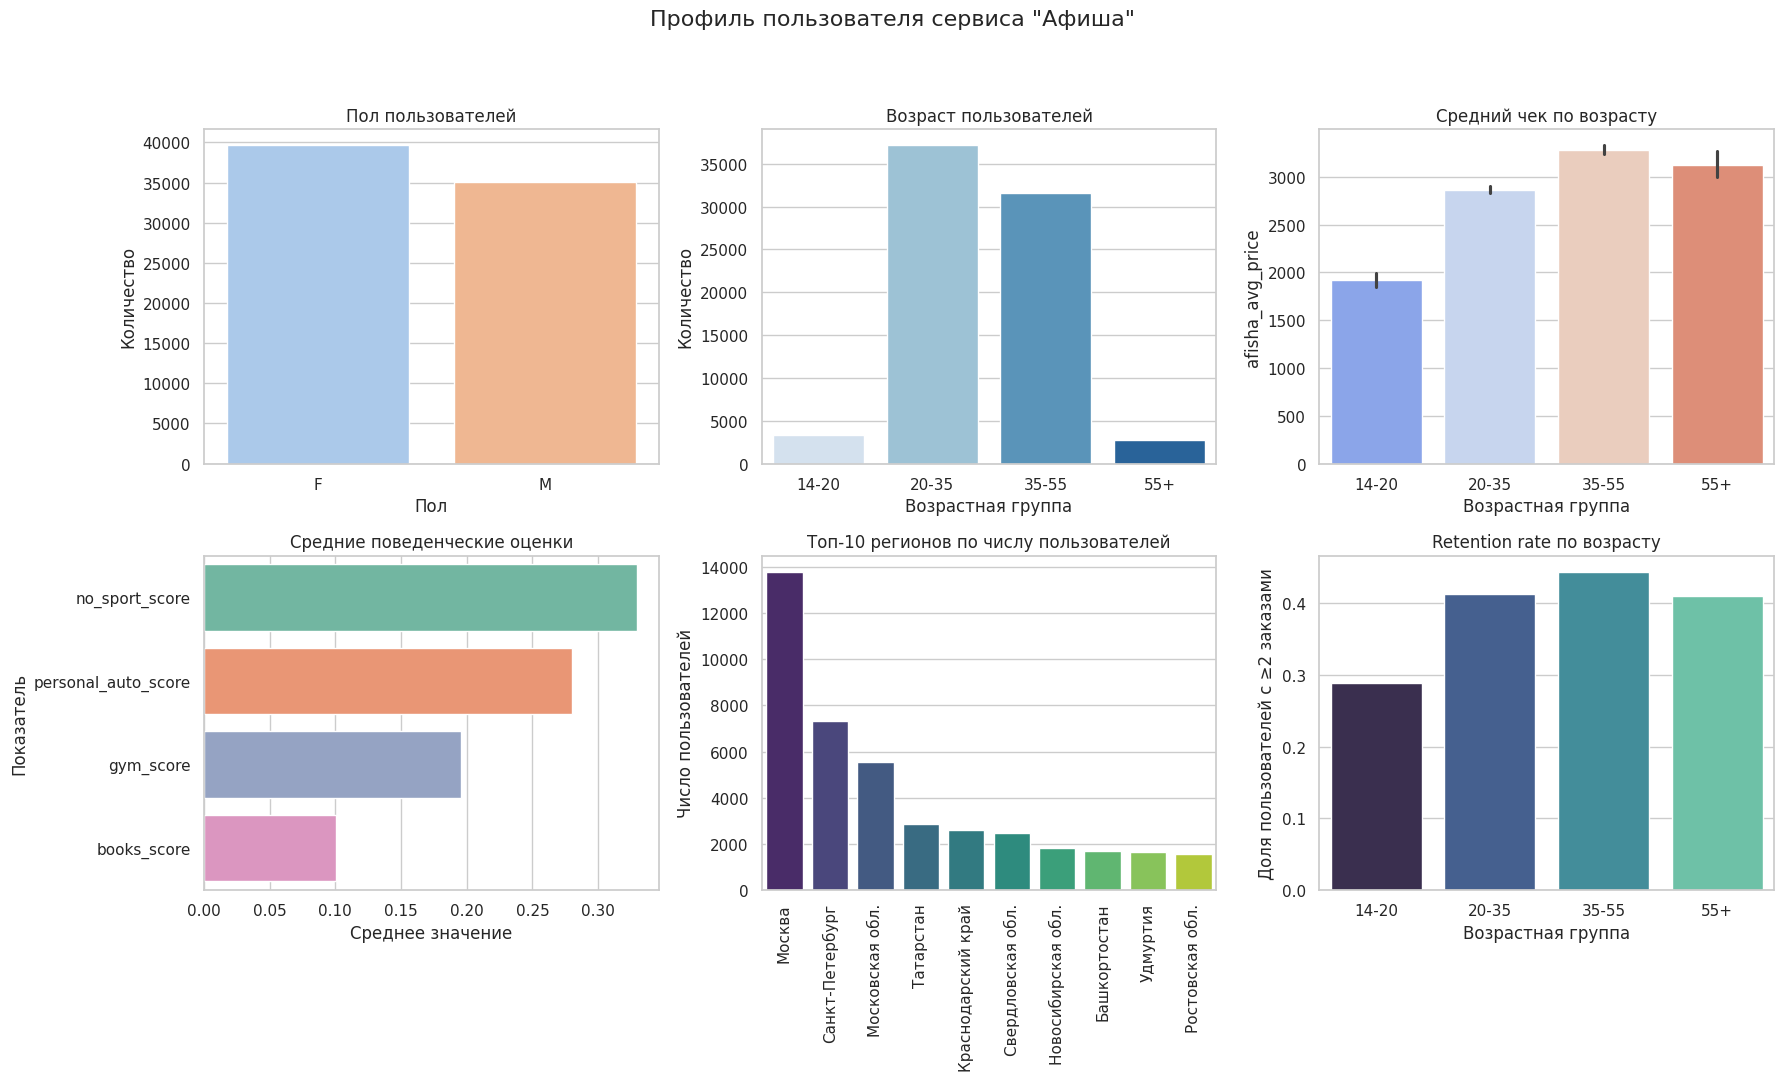

In [ ]:
# Пользователи с хотя бы одним заказом в "Афише"
afisha_users = df[df['afisha_n_orders'] > 0].copy()

# Возрастные группы
afisha_users = afisha_users[(afisha_users['age'] == afisha_users['age']) & (afisha_users['age'] >= 14) & (afisha_users['age'] <= 90)]
bins = [14, 20, 35, 55, 150]
labels = ['14-20', '20-35', '35-55', '55+']
afisha_users['age_group'] = pd.cut(afisha_users['age'], bins=bins, labels=labels, right=False)

# Флаг для повторного заказа
afisha_users['repeat'] = afisha_users['afisha_n_orders'] >= 2

# Доля повторных заказов по возрасту
afisha_grouped = afisha_users.groupby('age_group')
repeat_afisha = afisha_grouped['repeat'].mean()
retention_afisha = repeat_afisha.reset_index()

# Визуализация
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

# 1. Распределение по полу
plt.subplot(2, 3, 1)
sns.countplot(data=afisha_users, x='gender_cd', palette='pastel')
plt.title('Пол пользователей')
plt.xlabel('Пол')
plt.ylabel('Количество')

# 2. Возраст
plt.subplot(2, 3, 2)
sns.countplot(data=afisha_users, x='age_group', palette='Blues')
plt.title('Возраст пользователей')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')

# 3. Средний чек
plt.subplot(2, 3, 3)
sns.barplot(data=afisha_users, x='age_group', y='afisha_avg_price', palette='coolwarm')
plt.title('Средний чек по возрасту')
plt.xlabel('Возрастная группа')
plt.ylabel('afisha_avg_price')

# 4. Поведенческие оценки
plt.subplot(2, 3, 4)
behavior_columns = ['gym_score', 'no_sport_score', 'books_score', 'personal_auto_score']
behavior_means_afisha = afisha_users[behavior_columns].mean().sort_values(ascending=False)
sns.barplot(x=behavior_means_afisha.values, y=behavior_means_afisha.index, palette='Set2')
plt.title('Средние поведенческие оценки')
plt.xlabel('Среднее значение')
plt.ylabel('Показатель')

# 5. Топ регионов
plt.subplot(2, 3, 5)
top_reg_afisha = afisha_users['region'].value_counts().head(10)
region_names = {77: 'Москва', 78: 'Санкт-Петербург', 50: 'Московская обл.', 66: 'Свердловская обл.',
                54: 'Новосибирская обл.', 23: 'Краснодарский край', 61: 'Ростовская обл.',
                52: 'Удмуртия', 16: 'Татарстан', 2: 'Башкортостан'}
region_labels = [region_names.get(code, f'Регион {int(code)}') for code in top_reg_afisha.index]
sns.barplot(x=region_labels, y=top_reg_afisha.values, palette='viridis')
plt.title('Топ-10 регионов по числу пользователей')
plt.ylabel('Число пользователей')
plt.xticks(rotation=90)

# 6. Конверсия во второй заказ
plt.subplot(2, 3, 6)
sns.barplot(data=retention_afisha, x='age_group', y='repeat', palette='mako')
plt.title('Retention rate по возрасту')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля пользователей с ≥2 заказами')

plt.tight_layout()
plt.suptitle('Профиль пользователя сервиса "Афиша"', fontsize=16, y=1.08)
plt.show()


Профиль пользователя сервиса "Афиша"

1) В основном это люди в возрасте от 20 до 55 лет, существенных различий по полу нет

2) Чаще всего сервисом пользуются москвичи, но, опять же, это может объясняться бОльшим населением Москвы и бОльшим выбором развлекательных мероприятий.


У сервисов "Продукты" и "Афиша" пока низкое количество пользователей, поэтому резульаты могут быть не совсем репрезентативны